In [1]:
!pip install tensorflow==2.4.1 tensorflowflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.1 (from versions: 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0)
ERROR: No matching distribution found for tensorflow==2.4.1


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install opencv-python


     ---------------------------------------- 35.6/35.6 MB 3.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 7.4/7.4 MB 5.1 MB/s eta 0:00:00
     ---------------------------------------- 38.6/38.6 MB 3.9 MB/s eta 0:00:00
     -------------------------------------- 307.0/307.0 kB 4.8 MB/s eta 0:00:00
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=13e3398d9d41d9a2cc87267eb886baf0c76e9d9d7a0845b4528ab2130de17a07
  Stored in directory: c:\users\savit\appdata\local\pip\cache\wheels\9b\13\01\6f3a7fd641f90e1f6c8c7cded057f3394f451f340371c68f3d
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 5.5 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 4.9 MB/s eta 0:00:00
     -------------------------------------- 957.2/957.2 kB 3.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install mediapipe

     ---------------------------------------- 49.0/49.0 MB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 42.5/42.5 MB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 58.8/58.8 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Users\\SAVIT\\AppData\\Local\\Programs\\Python\\Python310\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



In [21]:
pip install mediapipe --user

  Using cached mediapipe-0.8.11-cp310-cp310-win_amd64.whl (49.0 MB)
  Using cached opencv_contrib_python-4.6.0.66-cp36-abi3-win_amd64.whl (42.5 MB)
  Using cached attrs-22.1.0-py2.py3-none-any.whl (58 kB)
Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install tensorflow-gpu --user

     ------------------------------------ 455.9/455.9 MB 827.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [4]:
mp_holistic = mp.solutions.holistic #Holistic Model
mp_drawing = mp.solutions.drawing_utils #Drawing Utilities

In [6]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #COLOR CONVERSION BGR TO RGB
    image.flags.writeable = False #Image has to be no longer writeable
    results = model.process(image) #Making predictions
    image.flags.writeable = True #Makinng the image writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #COLOR CONVERSION RGB TO BGR
    return image, results



In [42]:
cap = cv2.VideoCapture(0)
#Setting up mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
  while cap.isOpened():
    
    #Read Feed
    ret, frame = cap.read()
    
    #Making detections
    image, results = mediapipe_detection(frame, holistic)
    print(results)

    #drawing landmarks
    draw_styled_landmarks(image, results)
    
    #Popping up the camera feed
    cv2.imshow('OpenCV feed', image)
    
    #Providing a key for quitting camera
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
  cap.release()
  cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [24]:
len(results.face_landmarks.landmark)

468

In [25]:
results.left_hand_landmarks.landmark

[x: 0.8243010640144348
y: 0.5772865414619446
z: 4.2986289372493047e-07
, x: 0.75095134973526
y: 0.5740851759910583
z: -0.032077498733997345
, x: 0.6767734289169312
y: 0.5271362662315369
z: -0.048223406076431274
, x: 0.6288142800331116
y: 0.47122788429260254
z: -0.061864856630563736
, x: 0.5883576273918152
y: 0.420606791973114
z: -0.07469772547483444
, x: 0.6872212886810303
y: 0.3745478689670563
z: -0.028194837272167206
, x: 0.6364566087722778
y: 0.2931172251701355
z: -0.05383607745170593
, x: 0.6049249172210693
y: 0.24099591374397278
z: -0.07507899403572083
, x: 0.5805473327636719
y: 0.19244465231895447
z: -0.09097690880298615
, x: 0.7250155210494995
y: 0.33635008335113525
z: -0.03174804151058197
, x: 0.682220995426178
y: 0.23012800514698029
z: -0.053342629224061966
, x: 0.6528765559196472
y: 0.1634998470544815
z: -0.07248173654079437
, x: 0.628511369228363
y: 0.10789838433265686
z: -0.08683545142412186
, x: 0.7704031467437744
y: 0.3225345015525818
z: -0.04016170650720596
, x: 0.739371

In [19]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)



In [40]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                                                                                mp_drawing.DrawingSpec(color=(80,250,10), thickness=1, circle_radius=1))
   
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS , mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                                                                                mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2))
   
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                                                                                mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2))
   
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                                                                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))

In [9]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

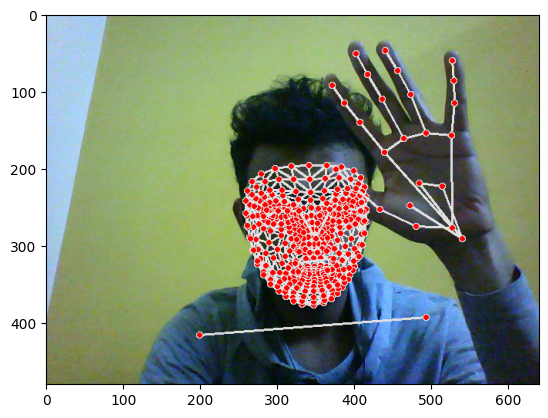

In [30]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [28]:
results

mediapipe.python.solution_base.SolutionOutputs

In [29]:
draw_landmarks(frame, results)